In [83]:
log_path = 'DSGD_maximum_degree'
import numpy as np
import re
import os
from omegaconf import OmegaConf
from flp2p.utils import compute_weight_matrix
import networkx as nx
import pickle
from flp2p.matcha_mixing_matrix import getAlpha, getProbability, getSubGraphs, graphToLaplacian

def get_metrics(data):
    overall_distance_p = re.compile(r'Overall consensus distance : ([\d\.]+)')
    inter_cluster_distance_p = re.compile(r'Inter-cluster distance : ([\d\.]+)')
    cluster_1_distance_p =  re.compile(r'Inter-cluster distance : ([\d\.]+)')
    cluster_2_distance_p =  re.compile(r'Cluster 2 consensus distance : ([\d\.]+)')
    spectral_gap_p = re.compile(r'Spectral Gap = ([\d\.]+)')
    
    overall_distance, inter_cluster_distance, cluster_1_distance, cluster_2_distance, spectral_gap = [], [], [], [], []
    for match in overall_distance_p.finditer(data):
        overall_distance.append(float(match.group(1)))
        
    for match in inter_cluster_distance_p.finditer(data):
        inter_cluster_distance.append(float(match.group(1)))
    
    for match in cluster_1_distance_p.finditer(data):
        cluster_1_distance.append(float(match.group(1)))
           
    for match in cluster_2_distance_p.finditer(data):
        cluster_2_distance.append(float(match.group(1)))
        
    for match in spectral_gap_p.finditer(data):
        spectral_gap.append(float(match.group(1)))

    return {"overall_distance": overall_distance,
            "inter_cluster_distance": inter_cluster_distance,
            "cluster_1_distance": cluster_1_distance,
            "cluster_2_distance": cluster_2_distance}
    
def extract_res(log_file, results):
    with open(f'{log_file}/main.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    with open(f'{log_file}/graph.pickle', 'rb') as f:
        graph = pickle.load(f)
            
    W = compute_weight_matrix(graph, config_file.mixing_matrix)
    eigenval = sorted(np.linalg.eig(W).eigenvalues, reverse=True)
    algebric_value = 1 - max(abs(eigenval[1]), abs(eigenval[-1]))
    res_dict = get_metrics(data)
    dict_key  =f'{log_file.split('/')[-2]}_{log_file.split('/')[-1]}_{config_file.mixing_matrix}'
    results[dict_key] = res_dict
    results[dict_key]['spectral_gap'] = algebric_value
    results[dict_key]['main_link_activation'] = config_file.main_link_activation
    results[dict_key]['border_link_activation'] = config_file.border_link_activation
    results[dict_key]['old_gradients'] = config_file.old_gradients
    

results = {}
for root, dirs, files in os.walk(log_path):
    if 'main.log' in files:
        log_file_path = root
        extract_res(log_file_path, results)
   


In [51]:
list(results.keys())

['18-10-48_maximum_degree-False-lenet5_maximum_degree',
 '18-10-48_maximum_degree-True-lenet5_maximum_degree',
 '2025-10-22_16-05-25_maximum_degree',
 '2025-10-22_15-54-05_maximum_degree',
 '17-53-49_maximum_degree-False-lenet5_maximum_degree',
 '17-53-49_maximum_degree-True-lenet5_maximum_degree',
 '2025-10-23_10-26-50_maximum_degree',
 '2025-10-23_10-41-45_maximum_degree',
 '2025-10-23_10-10-59_maximum_degree']

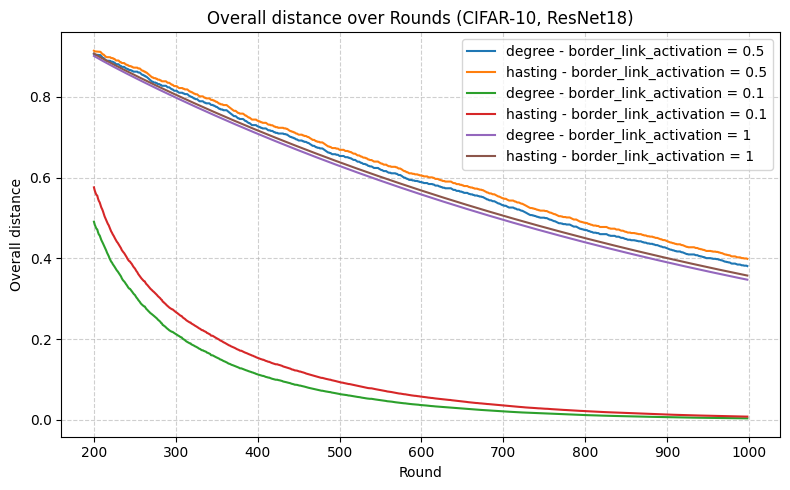

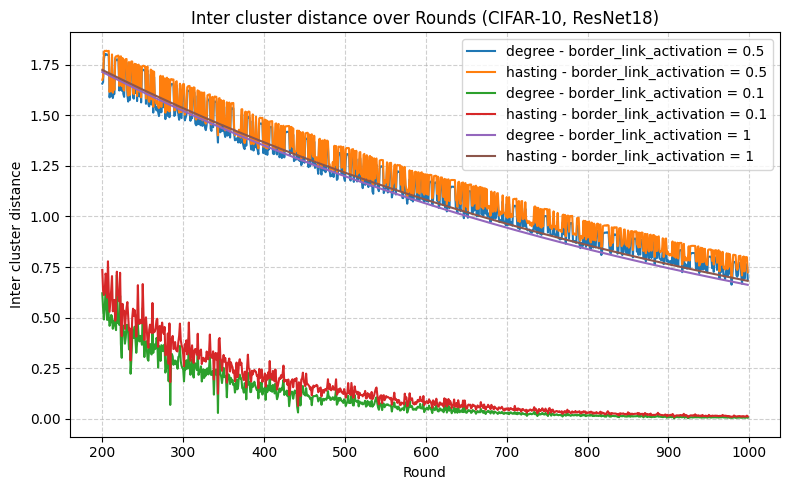

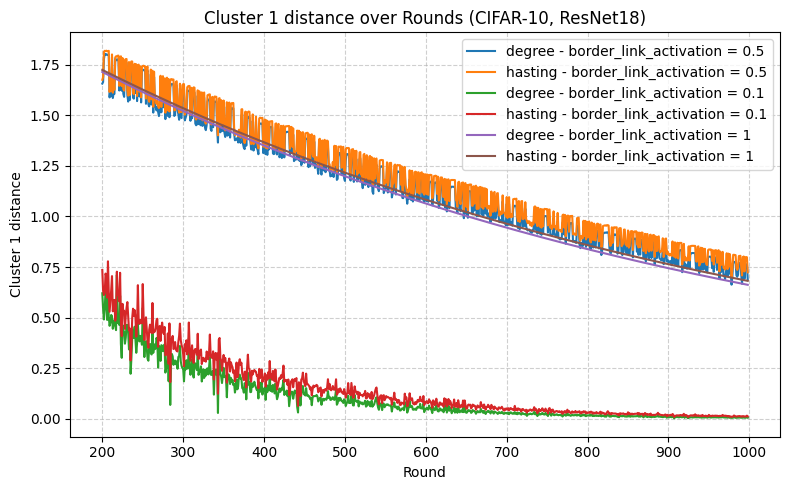

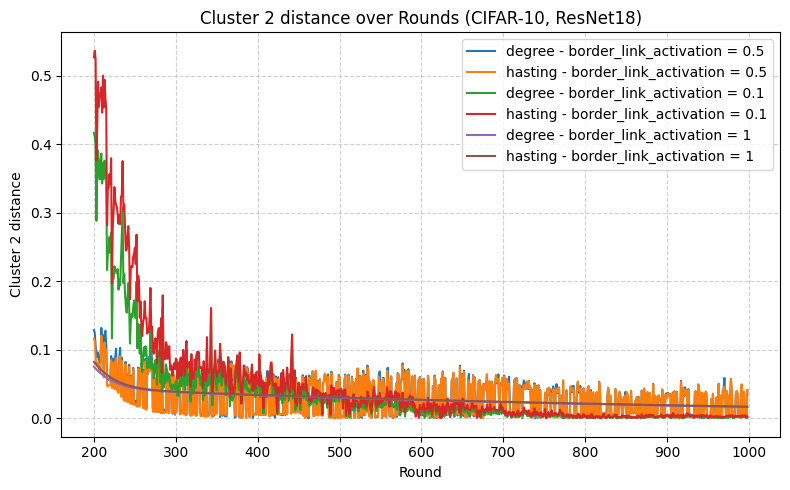

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

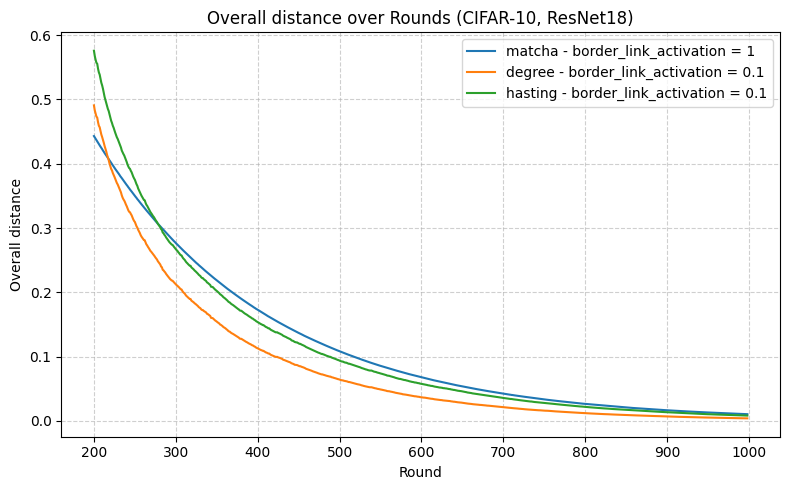

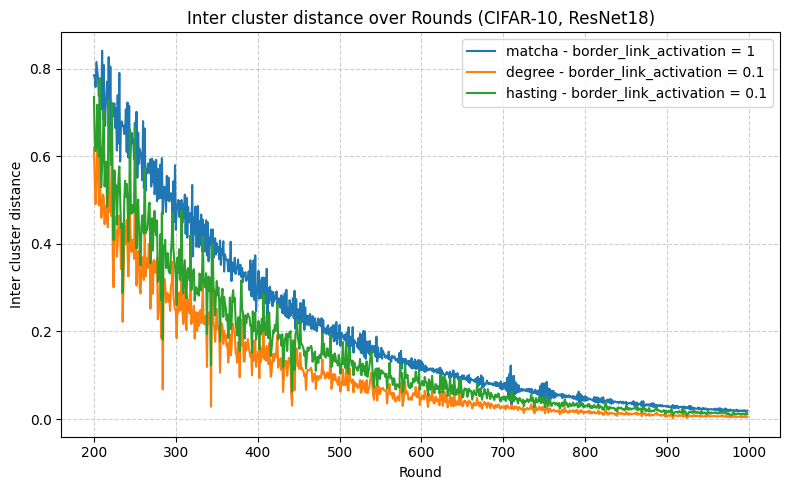

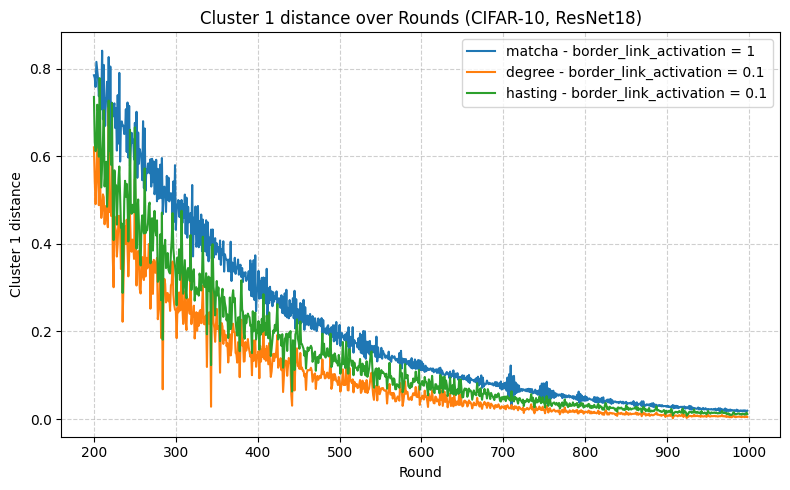

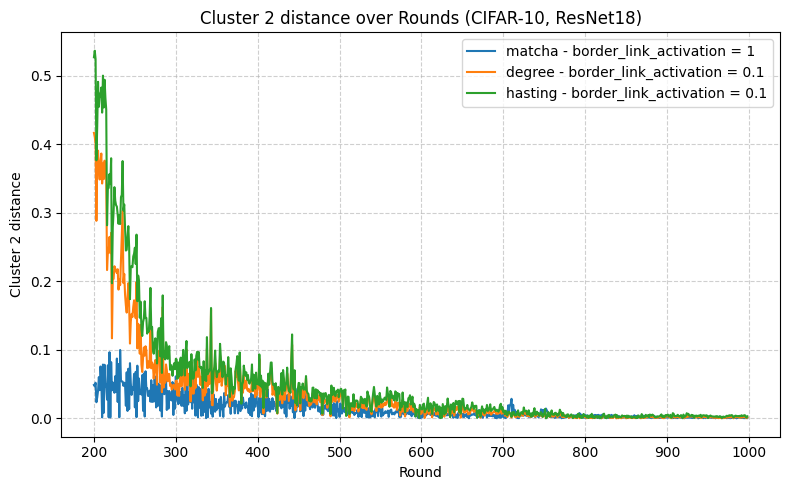

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
keys = list(results.keys())
index_elems = list(results[keys[0]].keys())
epochs = min(1000, min(len(results[k][index_elems[0]]) for k in keys))  
start = 200
for index_elem in index_elems:
    plt.figure(figsize=(8, 5))
    if type(results[list(results.keys())[0]][index_elem]) is not list:
        continue
    for key in ['11-20-44_maximum_degree-False-lenet5_maximum_degree',
 '11-20-44_metropolis_hasting-False-lenet5_metropolis_hasting','11-01-36_maximum_degree-False-lenet5_maximum_degree',
 '11-01-36_metropolis_hasting-False-lenet5_metropolis_hasting', '09-53-21_maximum_degree-False-lenet5_maximum_degree',
 '09-53-21_metropolis_hasting-False-lenet5_metropolis_hasting']:
        y = results[key].get(index_elem, None)            
        y = y[start:epochs]
        rounds = np.arange(start, start + len(y))
        label = f"{key.split('_')[-1]} - border_link_activation = {results[key]['border_link_activation']}"
        plt.plot(rounds, y, label=label)
    
    plt.xlabel("Round")
    plt.ylabel(index_elem.replace('_', ' ').capitalize())
    plt.title(f"{index_elem.replace('_', ' ').capitalize()} over Rounds (CIFAR-10, ResNet18)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    
for index_elem in index_elems:
    plt.figure(figsize=(8, 5))
    if type(results[list(results.keys())[0]][index_elem]) is not list:
        continue
    for key in ['09-53-21_matcha-False-lenet5_matcha', '11-01-36_maximum_degree-False-lenet5_maximum_degree', '11-01-36_metropolis_hasting-False-lenet5_metropolis_hasting']:
        y = results[key].get(index_elem, None)
        y = y[start:epochs]
        rounds = np.arange(start, start + len(y))
        label = f"{key.split('_')[-1]} - border_link_activation = {results[key]['border_link_activation']}"
        plt.plot(rounds, y, label=label)
    
    plt.xlabel("Round")
    plt.ylabel(index_elem.replace('_', ' ').capitalize())
    plt.title(f"{index_elem.replace('_', ' ').capitalize()} over Rounds (CIFAR-10, ResNet18)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [55]:
list(results.keys())

['18-10-48_maximum_degree-False-lenet5_maximum_degree',
 '18-10-48_maximum_degree-True-lenet5_maximum_degree',
 '2025-10-22_16-05-25_maximum_degree',
 '2025-10-22_15-54-05_maximum_degree',
 '17-53-49_maximum_degree-False-lenet5_maximum_degree',
 '17-53-49_maximum_degree-True-lenet5_maximum_degree',
 '2025-10-23_10-26-50_maximum_degree',
 '2025-10-23_10-41-45_maximum_degree',
 '2025-10-23_10-10-59_maximum_degree',
 '2025-10-23_11-05-35_maximum_degree',
 '2025-10-23_11-03-53_maximum_degree']

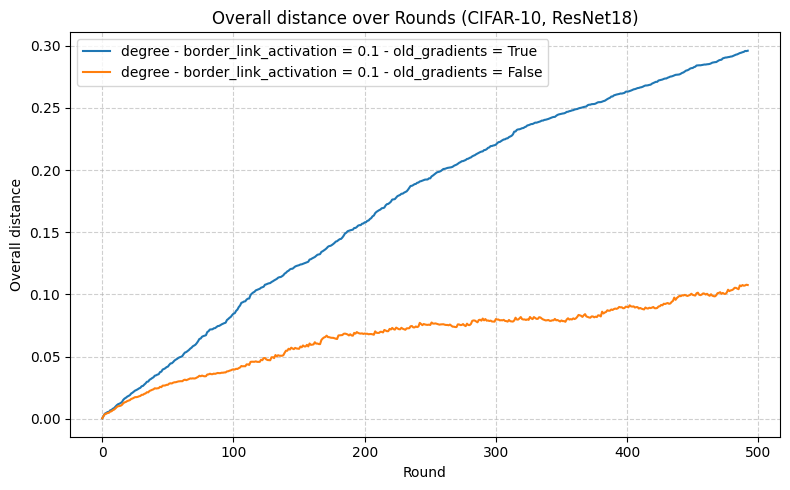

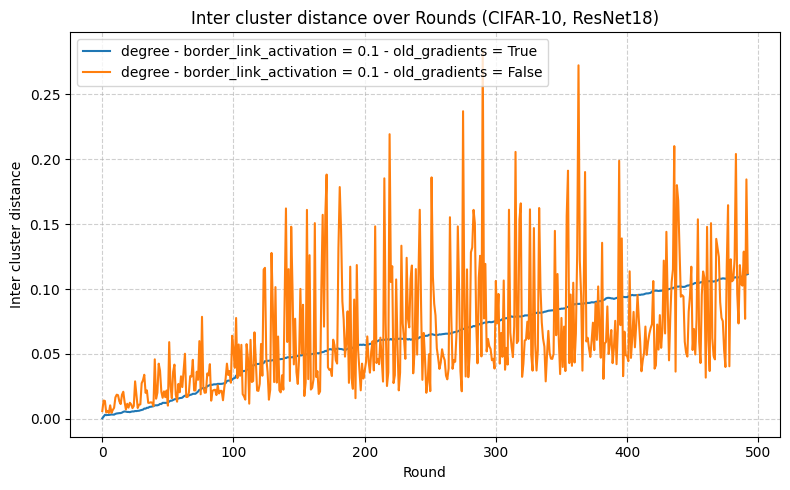

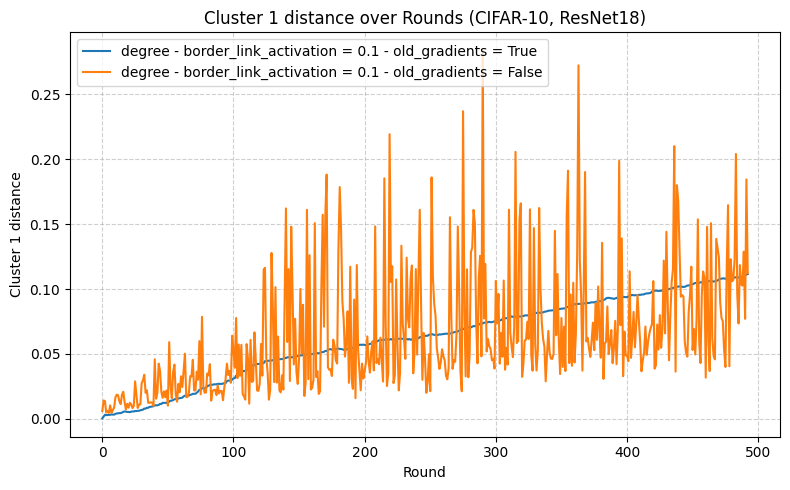

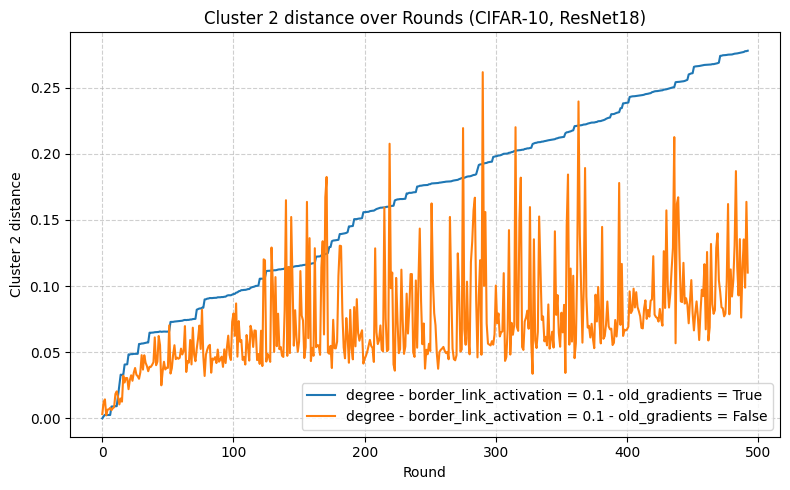

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [84]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
keys = list(results.keys())[8:]
index_elems = list(results[keys[0]].keys())
epochs = min(1000, min(len(results[k][index_elems[0]]) for k in keys))  
start = 0
for index_elem in index_elems:
    plt.figure(figsize=(8, 5))
    if type(results[list(results.keys())[0]][index_elem]) is not list:
        continue
    for key in ['2025-10-23_11-05-35_maximum_degree', '2025-10-23_11-03-53_maximum_degree']:
        y = results[key].get(index_elem, None)            
        y = y[start:epochs]
        rounds = np.arange(start, start + len(y))
        label = f"{key.split('_')[-1]} - border_link_activation = {results[key]['border_link_activation']} - old_gradients = {results[key]['old_gradients']}"
        plt.plot(rounds, y, label=label)
    
    plt.xlabel("Round")
    plt.ylabel(index_elem.replace('_', ' ').capitalize())
    plt.title(f"{index_elem.replace('_', ' ').capitalize()} over Rounds (CIFAR-10, ResNet18)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



In [69]:
for log_dir in os.listdir(log_path):
    log_file  = f'{log_path}/{log_dir}'
    if os.path.isfile(log_file):
        continue
    if log_dir == "15-38-50":
        continue
    with open(f'{log_file}/fixed_value_training.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    with open(f'{log_file}/graph.pickle', 'rb') as f:
        graph = pickle.load(f)  
    if config_file.mixing_matrix == 'matcha':
        algebric_values = []
        W = list()
        n_nodes = len(graph.nodes)
        subgraphs = getSubGraphs(graph, n_nodes)
        laplacians = graphToLaplacian(subgraphs, n_nodes)
        probas = getProbability(laplacians, 2/5)
        alpha = getAlpha(laplacians, probas, n_nodes)
        for _ in range(config_file.train.rounds):
            L_k = np.sum([laplacians[i] for i in range(len(subgraphs)) if np.random.random() < probas[i]], axis=0)
            eigenval = sorted(np.linalg.eig(np.eye(n_nodes) - alpha * L_k).eigenvalues, reverse=True)
            algebric_values.append(1 -max(abs(eigenval[1]), abs(eigenval[-1])))

FileNotFoundError: [Errno 2] No such file or directory: 'DSGD_maximum_degree/2025-10-22/fixed_value_training.log'